# Data wrangling

This dataset is from Kaggle competition, M5 forecasting - Accuracy. This dataset includes the unit sales of 3049 products across ten stores in three states for five years from 2011 to 2016. 

The dataset consists of four .csv files:

- calendar.csv
- sell_prices.csv
- sales_train_validation.csv 
- sales_train_evaluation.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from downcast import reduce
import os

## 1. Load Data

In [2]:
df_calendar = pd.read_csv('../Data/calendar.csv')
df_sell_prices = pd.read_csv('../Data/sell_prices.csv')
df_sales = pd.read_csv('../Data/sales_train_validation.csv')

## 2. Cleaning the Data

### 2.1. Calendar

This dataframe contains information about the dates, events, and SANP purchases.


In [3]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          1969 non-null   object
 1   wm_yr_wk      1969 non-null   int64 
 2   weekday       1969 non-null   object
 3   wday          1969 non-null   int64 
 4   month         1969 non-null   int64 
 5   year          1969 non-null   int64 
 6   d             1969 non-null   object
 7   event_name_1  162 non-null    object
 8   event_type_1  162 non-null    object
 9   event_name_2  5 non-null      object
 10  event_type_2  5 non-null      object
 11  snap_CA       1969 non-null   int64 
 12  snap_TX       1969 non-null   int64 
 13  snap_WI       1969 non-null   int64 
dtypes: int64(7), object(7)
memory usage: 215.5+ KB


In [4]:
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [5]:
df_calendar['event_name_1'].unique()

array([nan, 'SuperBowl', 'ValentinesDay', 'PresidentsDay', 'LentStart',
       'LentWeek2', 'StPatricksDay', 'Purim End', 'OrthodoxEaster',
       'Pesach End', 'Cinco De Mayo', "Mother's day", 'MemorialDay',
       'NBAFinalsStart', 'NBAFinalsEnd', "Father's day",
       'IndependenceDay', 'Ramadan starts', 'Eid al-Fitr', 'LaborDay',
       'ColumbusDay', 'Halloween', 'EidAlAdha', 'VeteransDay',
       'Thanksgiving', 'Christmas', 'Chanukah End', 'NewYear',
       'OrthodoxChristmas', 'MartinLutherKingDay', 'Easter'], dtype=object)

In [6]:
df_calendar['event_name_2'].unique()

array([nan, 'Easter', 'Cinco De Mayo', 'OrthodoxEaster', "Father's day"],
      dtype=object)

In [7]:
df_calendar['event_type_1'].unique()

array([nan, 'Sporting', 'Cultural', 'National', 'Religious'], dtype=object)

In [8]:
df_calendar['event_type_2'].unique()

array([nan, 'Cultural', 'Religious'], dtype=object)

In [9]:
# If there is no event on that day,  
# nan appears in the event name and event type columns.
# Replace nan with 'no_event'

df_calendar.fillna('no_event',inplace = True) 
df_calendar.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,no_event,no_event,no_event,no_event,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,no_event,no_event,no_event,no_event,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,no_event,no_event,no_event,no_event,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,no_event,no_event,no_event,no_event,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,no_event,no_event,no_event,no_event,1,0,1


In [10]:
# change date column to DateTime

df_calendar['date'] = pd.to_datetime(df_calendar['date'])

In [11]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  1969 non-null   object        
 8   event_type_1  1969 non-null   object        
 9   event_name_2  1969 non-null   object        
 10  event_type_2  1969 non-null   object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


### 2.2. Sales

This dataframe contains the daily unit sales per product and store

In [12]:
df_sales.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913
0,HOBBIES_1_001_CA_1_validation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,3,0,1,1,1,3,0,1,1
1,HOBBIES_1_002_CA_1_validation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,2,1,1,1,0,1,1,1
3,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,5,4,1,0,1,3,7,2
4,HOBBIES_1_005_CA_1_validation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,1,1,0,1,1,2,2,2,4


In [13]:
df_sales.shape

(30490, 1919)

In [14]:
df_sales['cat_id'].unique()

array(['HOBBIES', 'HOUSEHOLD', 'FOODS'], dtype=object)

In [15]:
df_sales['dept_id'].unique()

array(['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1',
       'FOODS_2', 'FOODS_3'], dtype=object)

In [16]:
# check the total number of products in each departments.

df_sales.groupby('dept_id')['item_id'].describe()

,count,unique,top,freq
dept_id,,,,
FOODS_1,2160,216,FOODS_1_098,10
FOODS_2,3980,398,FOODS_2_284,10
FOODS_3,8230,823,FOODS_3_752,10
HOBBIES_1,4160,416,HOBBIES_1_058,10
HOBBIES_2,1490,149,HOBBIES_2_064,10
HOUSEHOLD_1,5320,532,HOUSEHOLD_1_468,10
HOUSEHOLD_2,5150,515,HOUSEHOLD_2_300,10


#### Distribution of the number of products  by category and state.

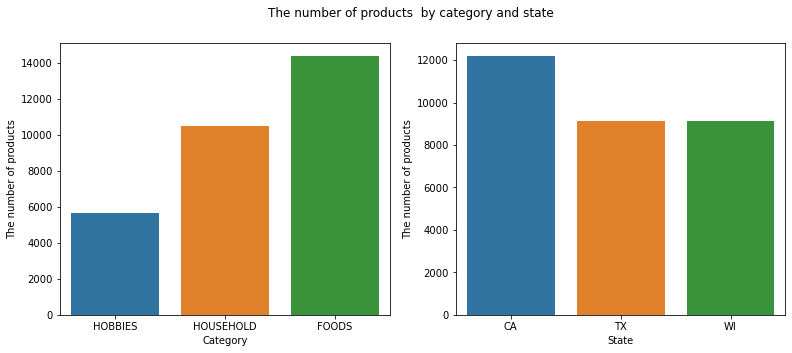

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13,5))

fig.suptitle('The number of products  by category and state')


sns.countplot(ax=axes[0], x = df_sales['cat_id']);
sns.countplot(ax=axes[1],x = df_sales['state_id']);

axes[0].set(xlabel='Category', ylabel='The number of products');
axes[1].set(xlabel='State', ylabel='The number of products');

### 2.3. Sell Prices

This dataframe Contains information about the weekly price of the products sold in each stores.


In [18]:
df_sell_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6841121 entries, 0 to 6841120
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   store_id    object 
 1   item_id     object 
 2   wm_yr_wk    int64  
 3   sell_price  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 208.8+ MB


In [19]:
df_sell_prices.head()

,store_id,item_id,wm_yr_wk,sell_price
0,CA_1,HOBBIES_1_001,11325,9.58
1,CA_1,HOBBIES_1_001,11326,9.58
2,CA_1,HOBBIES_1_001,11327,8.26
3,CA_1,HOBBIES_1_001,11328,8.26
4,CA_1,HOBBIES_1_001,11329,8.26


In [20]:
df_sell_prices['store_id'].unique()

array(['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1',
       'WI_2', 'WI_3'], dtype=object)

In [21]:
df_sell_prices['item_id'].nunique()

3049

In [22]:
df_sell_prices['wm_yr_wk'].nunique()

282

Note that the total row of this dataframe is 6,841,121. Since 3049 products were sold in 10 different stores during 282 weeks, the information about prices must equal 8,598,180 in total. Here, if the product was not sold during the examined week, it is not included in the dataframe.



## 3. Data Sampling


I use a sample of 10% of the data for this capstone project. The sample is randomly drawn from each department. 

In [23]:
# Choose 10% of product from each department
# df_sample is a list of proudct in sampling data

df_sample= df_sales[df_sales['store_id']=='CA_1'].groupby('dept_id')['item_id'].apply(lambda x: x.sample(frac=0.1))

In [24]:
df_sample = df_sample.reset_index()
df_sample.groupby('dept_id')['item_id'].describe()

,count,unique,top,freq
dept_id,,,,
FOODS_1,22,22,FOODS_1_155,1
FOODS_2,40,40,FOODS_2_193,1
FOODS_3,82,82,FOODS_3_670,1
HOBBIES_1,42,42,HOBBIES_1_266,1
HOBBIES_2,15,15,HOBBIES_2_026,1
HOUSEHOLD_1,53,53,HOUSEHOLD_1_151,1
HOUSEHOLD_2,52,52,HOUSEHOLD_2_300,1


## 4. Merging Data

In [25]:
# Use df_sample to pick the listed product from df_sales_train.

df_merge = pd.merge(df_sales, df_sample ,how = 'inner',on= ['item_id'])

In [26]:
df_merge.head()

,id,item_id,dept_id_x,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911,d_1912,d_1913,dept_id_y,level_1
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,5,4,1,0,1,3,7,2,HOBBIES_1,3
1,HOBBIES_1_004_CA_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_2,CA,6,3,2,8,...,1,2,4,3,0,3,3,1,HOBBIES_1,3
2,HOBBIES_1_004_CA_3_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_3,CA,0,0,0,0,...,10,15,3,0,3,4,12,3,HOBBIES_1,3
3,HOBBIES_1_004_CA_4_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_4,CA,1,1,2,2,...,1,1,1,0,1,1,1,0,HOBBIES_1,3
4,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,1,2,1,0,...,2,0,1,0,0,0,2,2,HOBBIES_1,3


In [27]:
# Use pd.melt 

df_melt = pd.melt(df_merge, id_vars = ['id','item_id','dept_id_x','cat_id','store_id','state_id'], var_name = 'd' , value_name = 'sales')

In [28]:
df_melt.head()

,id,item_id,dept_id_x,cat_id,store_id,state_id,d,sales
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0
1,HOBBIES_1_004_CA_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_2,CA,d_1,6
2,HOBBIES_1_004_CA_3_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_3,CA,d_1,0
3,HOBBIES_1_004_CA_4_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_4,CA,d_1,1
4,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1


In [29]:
# merge calendar with df_melt

df_merge_calendar = pd.merge(df_melt, df_calendar, on= ['d'])

In [30]:
df_merge_calendar.head()

,id,item_id,dept_id_x,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,...,wday,month,year,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,HOBBIES_1_004_CA_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,d_1,0,2011-01-29,11101,...,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
1,HOBBIES_1_004_CA_2_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_2,CA,d_1,6,2011-01-29,11101,...,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
2,HOBBIES_1_004_CA_3_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_3,CA,d_1,0,2011-01-29,11101,...,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
3,HOBBIES_1_004_CA_4_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_4,CA,d_1,1,2011-01-29,11101,...,1,1,2011,no_event,no_event,no_event,no_event,0,0,0
4,HOBBIES_1_004_TX_1_validation,HOBBIES_1_004,HOBBIES_1,HOBBIES,TX_1,TX,d_1,1,2011-01-29,11101,...,1,1,2011,no_event,no_event,no_event,no_event,0,0,0


In [31]:
# merge df_sell_prices with df_merge_calendar
# Keep the rows with 0 sales 

df = pd.merge(df_merge_calendar, df_sell_prices,how='left', on=["store_id", "item_id", "wm_yr_wk"])

In [32]:
df.isnull().sum()

id                    0
item_id               0
dept_id_x             0
cat_id                0
store_id              0
state_id              0
d                     0
sales                 0
date                  0
wm_yr_wk              0
weekday               0
wday                  0
month                 0
year                  0
event_name_1          0
event_type_1          0
event_name_2          0
event_type_2          0
snap_CA               0
snap_TX               0
snap_WI               0
sell_price      1325443
dtype: int64

In [ ]:
# replace nan in sell_price with average price.

df['sell_price'] = df.groupby('item_id')['sell_price'].transform(lambda x: x.fillna(x.mean()))

In [ ]:
df.info()

In [ ]:
#  Reduce pandas data-frame size using downcast.
df = reduce(df)

In [ ]:
df_reduce.info()

In [ ]:
# save the data to a new csv file

df.to_csv('data_cleaned.csv',index=False)